In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import stats
from os import listdir
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from scipy.ndimage import rotate
pathfile='E:/gps20new/'

In [2]:
test=listdir(pathfile)[66]
sigma=2.5

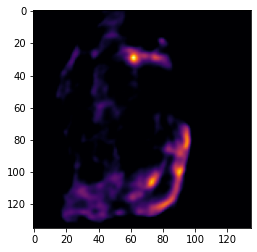

In [3]:
image=fits.getdata(pathfile+test)
_, median, std = stats.sigma_clipped_stats(image, sigma=sigma)
image[image<median+sigma*std]=median+sigma*std
plt.imshow(image,cmap='inferno')

In [4]:
def binning(arr, new_shape):              #works only when array.shape%arr.new_shape is zero
    shape = (new_shape[0], arr.shape[0] // new_shape[0],
             new_shape[1], arr.shape[1] // new_shape[1])
    return arr.reshape(shape).mean(-1).mean(1)

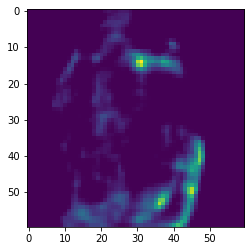

In [5]:
im_resized=binning(image[0:120,0:120],(60,60))
plt.imshow(im_resized)

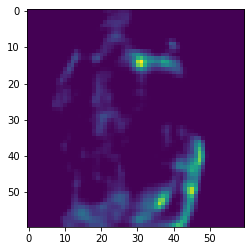

In [6]:
reimage=resize(image[0:120,0:120],(60,60))                #Works even when array.shape%arr.new_shape is non zero
plt.imshow(reimage)

In [7]:
direc1='E:/gps20new/'
direc2='E:/missing/'
direc3='E:/pointsources/'
n1,n2=len(listdir(direc1)),len(listdir(direc2))
bad1=[1,2,3,4,5,7,9,10,19,14,24,25,26,27,28,32,35,36,38,39,42,46,49,50,51,52,60,62,64,65,68,69]
bad2=[0,1,2,3,4,6,7,10,14,15,16]
good2sigma1=[6,12,17,18,22,29,33,43,44,45,48,58,66,67]
good1sigma1=[0,11,15,16,34,41,47,53,56]
good_5sigma1=[8,23,31,55,57,61]
good3sigma1=[13,37,40,59]
good800log1=[20]
good50log1=[30]
good600log1=[21]
good200log1sigma1=[54,63]
good2sigma2=[12]
good1sigma2=[8,9,13]
good_5sigma2=[5,11]
good3sigma3=[2,6,7,8,11,15,40,46,47,49,50,53,57,59,60,61,64,67,68,69]

In [8]:
def key1(x):
    if x[0]=='G':
        return x.split('.')[0].strip('G')
    else:
        return x.split('J')[1].split('-')[0].split('+')[0]
def key2(x):
    return x.split('.')[1][:6]
keys=lambda x:(int(key1(x)),key2(x))
snr1=sorted(listdir(direc1),key=keys)
snr2=sorted(listdir(direc2),key=keys)
points=sorted(listdir(direc3),key=keys)
xpix,ypix=75,75

In [9]:
def logscaling(arr,const=800):
    logarr=np.log10(const*arr+1)/np.log10(const)
    return logarr
def sigmaclip(arr,sigma=1):
    cpy=arr.copy()
    _, median, std = stats.sigma_clipped_stats(cpy, sigma=sigma)
    cpy[cpy<median+sigma*std]=median+sigma*std
    return cpy
def normalise(arr):
    return 2*((arr-np.min(arr))/(np.max(arr)-np.min(arr)))-1

In [10]:
#SIGMA CLIPPING, LOGSCALING
#set1,set2,pointsrc=np.zeros((n1-len(bad1),xpix,ypix,1)),np.zeros((n2-len(bad2),xpix,ypix,1)),np.zeros((len(good3sigma3),xpix,ypix,1))
ls1,ls2,ls3=[],[],[]
j,k,l=0,0,0
for i,x in enumerate(snr2):
    if i not in bad2:    
        temp=fits.getdata(direc2+x)
        if i in good2sigma2:
            temp=sigmaclip(temp,sigma=2)
        elif i in good1sigma2:
            temp=sigmaclip(temp)
        elif i in good_5sigma2:
            temp=sigmaclip(temp,sigma=0.5)
#        set2[j,:,:,0]=resize(temp,(xpix,ypix))
        ls2.append(normalise(resize(temp,(xpix,ypix))))
#        j+=1   
for i,x in enumerate(snr1):
    if i not in bad1:
        temp=fits.getdata(direc1+x)
        if i in good2sigma1:
            temp=sigmaclip(temp,sigma=2)
        elif i in good1sigma1:
            temp=sigmaclip(temp)
        elif i in good3sigma1:
            temp=sigmaclip(temp,sigma=3)
        elif i in good800log1:
            temp=logscaling(temp)
        elif i in good600log1:
            temp=logscaling(temp,const=600)
        elif i in good50log1:
            temp=logscaling(temp,const=50)
        elif i in good200log1sigma1:
            temp=logscaling(temp,const=200)
            temp=sigmaclip(temp)
        elif i in good_5sigma1:
            temp=sigmaclip(temp,sigma=0.5)    
#        set1[k,:,:,0]=resize(temp,(xpix,ypix))
        ls1.append(normalise(resize(temp,(xpix,ypix))))
 #       k+=1   
for i,x in enumerate(points):
    if i in good3sigma3:
        temp=fits.getdata(direc3+x)
        temp=sigmaclip(temp,sigma=3)
#        pointsrc[l,:,:,0]=resize(temp,(xpix,ypix))
        ls3.append(normalise(resize(temp,(xpix,ypix))))
#        l+=1
originalset=ls1+ls2+ls3

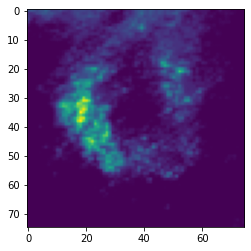

In [11]:
plt.imshow(np.flipud(np.fliplr(ls1[0])))

In [12]:
ls1[0]

array([[-0.9997464 , -0.994348  , -0.9782517 , ..., -1.        ,
        -1.        , -1.        ],
       [-0.95158464, -0.9985323 , -0.98907065, ..., -1.        ,
        -1.        , -1.        ],
       [-0.96116817, -0.9951913 , -0.945004  , ..., -1.        ,
        -1.        , -1.        ],
       ...,
       [-0.9999998 , -0.9999896 , -0.99999946, ..., -0.81493163,
        -0.7644174 , -0.6840918 ],
       [-0.9999856 , -0.99886405, -0.9998837 , ..., -0.6897608 ,
        -0.7397375 , -0.72308624],
       [-0.99997675, -0.9961367 , -0.99352103, ..., -0.51659286,
        -0.4855473 , -0.52162266]], dtype=float32)

In [13]:
#Augmentation
#propeller_to_rotate()
np.random.seed(7) #for replicating results
angles=[360*i for i in np.random.sample(39)]
angles.append(0.0)#40 orientations, 3 flip variants for 120*original sample. (~139 in Liu et al paper)

In [14]:
augmentedset,labels=[],[]
for i,x in enumerate(originalset):
    for j in angles:
        augmentedset.append(rotate(x,j,reshape=False))
        augmentedset.append(rotate(np.fliplr(x),j,reshape=False))
        augmentedset.append(rotate(np.flipud(x),j,reshape=False))


In [15]:
labels=[1. if i<44*40*3 else 0. for i in range(len(augmentedset))]
labels=np.array(labels)

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(augmentedset,labels,test_size=0.3)

In [17]:
trainarray,testarray=np.zeros((len(xtrain),xpix,ypix,1)),np.zeros((len(xtest),xpix,ypix,1))
for i in range(len(xtrain)):
    trainarray[i,:,:,0]=xtrain[i]#convert each 2d image to a a 3d array with 1 'channel' and normalise.
for i in range(len(xtest)):
    testarray[i,:,:,0]=xtest[i]    

In [18]:
testarray.shape

(2304, 75, 75, 1)

In [19]:
#import tensorflow modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [24]:
def snr_ptsrc_classifier():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(xpix,ypix,1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    Dropout(0.6)
    model.add(Dense(1, activation='relu'))
    return model
 

In [25]:
def plotting(history):
    plt.subplot(211)
    plt.title('Cross Entropy Loss') # plot loss
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.legend()
    plt.subplot(212)
    plt.title('Classification Accuracy')#plot accuracy
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.legend()

Epoch 1/10
168/168 [==============================] - 9s 54ms/step - loss: 4.7845 - accuracy: 0.6830
Epoch 2/10
168/168 [==============================] - 9s 53ms/step - loss: 4.8051 - accuracy: 0.6849
Epoch 3/10
168/168 [==============================] - 9s 54ms/step - loss: 4.8051 - accuracy: 0.6849
Epoch 4/10
168/168 [==============================] - 9s 55ms/step - loss: 4.8051 - accuracy: 0.6849
Epoch 5/10
168/168 [==============================] - 9s 53ms/step - loss: 4.8051 - accuracy: 0.6849
Epoch 6/10
168/168 [==============================] - 9s 52ms/step - loss: 4.8051 - accuracy: 0.6849
Epoch 7/10
168/168 [==============================] - 9s 57ms/step - loss: 4.8051 - accuracy: 0.6849
Epoch 8/10
168/168 [==============================] - 10s 57ms/step - loss: 4.8051 - accuracy: 0.6849
Epoch 9/10
168/168 [==============================] - 9s 54ms/step - loss: 4.8051 - accuracy: 0.6849
Epoch 10/10
72/72 [==============================] - 1s 17ms/step - loss: 4.6727 - accurac

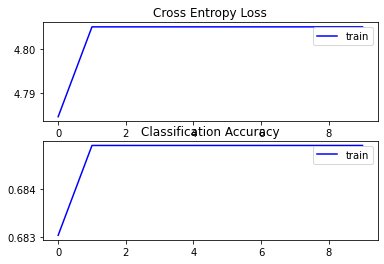

In [26]:
model = snr_ptsrc_classifier()  # model instance
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(trainarray,ytrain,batch_size=32,epochs=10,verbose=1)
model.evaluate(testarray,ytest,verbose=1)
plotting(history)

In [23]:
history.history

{'loss': [4.80509614944458,
  4.8050994873046875,
  4.8050971031188965,
  4.8050971031188965,
  4.805098533630371,
  4.805099010467529,
  4.805098533630371,
  4.8050971031188965,
  4.805098533630371,
  4.805097579956055],
 'accuracy': [0.6848958134651184,
  0.6848958134651184,
  0.6848958134651184,
  0.6848958134651184,
  0.6848958134651184,
  0.6848958134651184,
  0.6848958134651184,
  0.6848958134651184,
  0.6848958134651184,
  0.6848958134651184]}

In [417]:
predictions=model.predict(testarray)

In [418]:
np.sqrt(np.sum((predictions-ytest)**2)/len(predictions))

31.488028867131497

In [423]:
trainpredictions=model.predict(trainarray)

In [424]:
np.sqrt(np.sum((trainpredictions-ytest)**2)/len(trainpredictions))

31.471096654061043

In [438]:
predictions[:10]

array([[1.0000000e+00],
       [3.7994113e-12],
       [4.3372984e-07],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [2.7997449e-10],
       [7.9197560e-12],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [439]:
ytest[:10]

array([1., 0., 0., 1., 1., 1., 0., 0., 1., 1.])